In [1]:
library(psych)
library(car)
library(dummies)


Attaching package: 'car'

The following object is masked from 'package:psych':

    logit

dummies-1.5.6 provided by Decision Patterns



In [2]:
Workingdirection = "C:/Users/Administrator/Documents/Master/MSIS-5223-70250 - Programming for Data Sci - 8282017 - 159 PM/Homework";
Path = paste(Workingdirection,"//splityield.txt",sep ="");
df = read.table (Path,header=T, sep='\t')

In [28]:
dfnew = df

In [4]:
attach(dfnew)

In [5]:
names(dfnew)

[1] "yield"      "block"      "irrigation" "density"    "fertilizer"

In [6]:
range(yield)

[1]  60 136

In [7]:
summary(dfnew)

     yield        block      irrigation   density   fertilizer
 Min.   : 60.00   A:18   control  :36   high  :24   N :24     
 1st Qu.: 86.00   B:18   irrigated:36   low   :24   NP:24     
 Median : 95.00   C:18                  medium:24   P :24     
 Mean   : 99.72   D:18                                        
 3rd Qu.:114.00                                               
 Max.   :136.00                                               

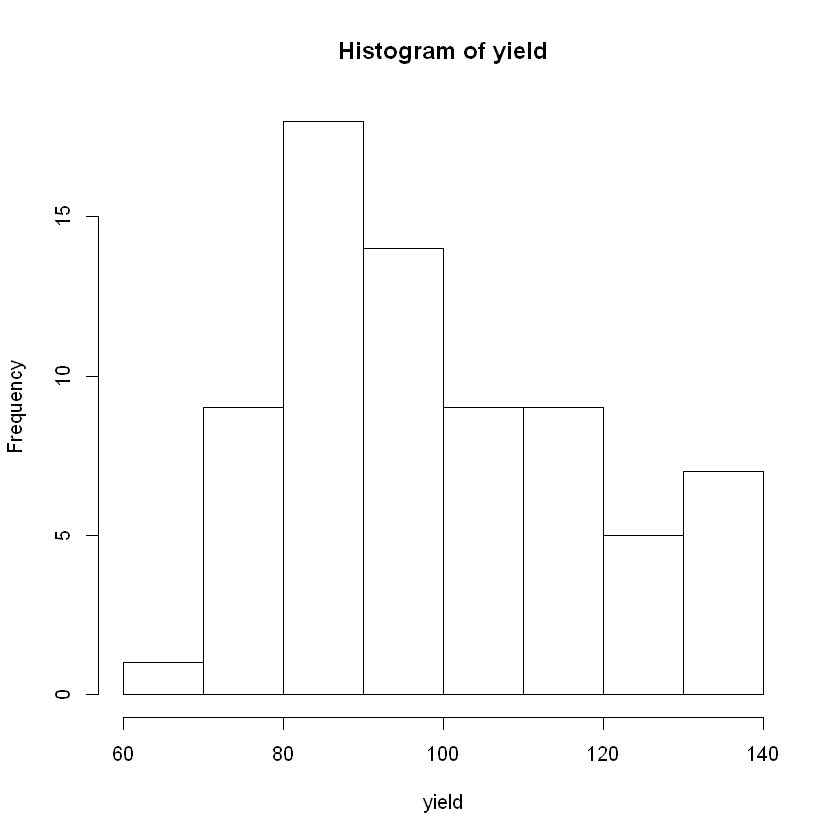

In [8]:
hist(yield)

In [9]:
str(dfnew)

'data.frame':	72 obs. of  5 variables:
 $ yield     : int  90 95 107 92 89 92 81 92 93 80 ...
 $ block     : Factor w/ 4 levels "A","B","C","D": 1 1 1 1 1 1 1 1 1 1 ...
 $ irrigation: Factor w/ 2 levels "control","irrigated": 1 1 1 1 1 1 1 1 1 2 ...
 $ density   : Factor w/ 3 levels "high","low","medium": 2 2 2 3 3 3 1 1 1 2 ...
 $ fertilizer: Factor w/ 3 levels "N","NP","P": 1 3 2 1 3 2 1 3 2 1 ...


In [29]:
dfnew.dummy = dfnew[c(2,3,4,5)]
head(dfnew.dummy)

block,irrigation,density,fertilizer
A,control,low,N
A,control,low,P
A,control,low,NP
A,control,medium,N
A,control,medium,P
A,control,medium,NP


In [30]:
dfnew.dummy <- dummy.data.frame(dfnew.dummy, sep = ".")
 names(dfnew.dummy)

[1] "block.A"              "block.B"              "block.C"             
 [4] "block.D"              "irrigation.control"   "irrigation.irrigated"
 [7] "density.high"         "density.low"          "density.medium"      
[10] "fertilizer.N"         "fertilizer.NP"        "fertilizer.P"

In [31]:
df1 = dfnew[c(1)];

In [32]:
dfnew.dummy = data.frame(df1, dfnew.dummy)

In [33]:
attach(dfnew.dummy)

The following objects are masked from dfnew.dummy (pos = 3):

    block.A, block.B, block.C, block.D, density.high, density.low,
    density.medium, fertilizer.N, fertilizer.NP, fertilizer.P,
    irrigation.control, irrigation.irrigated, yield

The following object is masked from dfnew:

    yield



In [15]:
dfnew_reg.fit = lm(yield ~.,data = dfnew.dummy)

In [16]:
summary(dfnew_reg.fit)


Call:
lm(formula = yield ~ ., data = dfnew.dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.833  -7.597   0.806   8.615  27.792 

Coefficients: (4 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          116.2639     4.7869  24.288  < 2e-16 ***
block.A               -3.7778     4.5131  -0.837  0.40572    
block.B                0.4444     4.5131   0.098  0.92186    
block.C               -0.8889     4.5131  -0.197  0.84449    
block.D                    NA         NA      NA       NA    
irrigation.control   -21.4444     3.1912  -6.720 6.14e-09 ***
irrigation.irrigated       NA         NA      NA       NA    
density.high          -0.8333     3.9084  -0.213  0.83185    
density.low          -10.8750     3.9084  -2.782  0.00711 ** 
density.medium             NA         NA      NA       NA    
fertilizer.N          -7.6667     3.9084  -1.962  0.05424 .  
fertilizer.NP          5.0833     3.9084   1.301  0.198

In [17]:
#Model1: yield= 116.2639 - 21.4444 * irrigation.control -10.8750 * density.low

In [25]:
dfnew_reg.fit = lm(yield ~irrigation.control+density.low,data = dfnew.dummy)

In [26]:
summary(dfnew_reg.fit)


Call:
lm(formula = yield ~ irrigation.control + density.low, data = dfnew.dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.472  -6.736   1.243   8.319  24.972 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         113.931      2.628  43.345  < 2e-16 ***
irrigation.control  -21.444      3.325  -6.450  1.3e-08 ***
density.low         -10.458      3.526  -2.966  0.00414 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.11 on 69 degrees of freedom
Multiple R-squared:  0.4221,	Adjusted R-squared:  0.4053 
F-statistic:  25.2 on 2 and 69 DF,  p-value: 6.08e-09


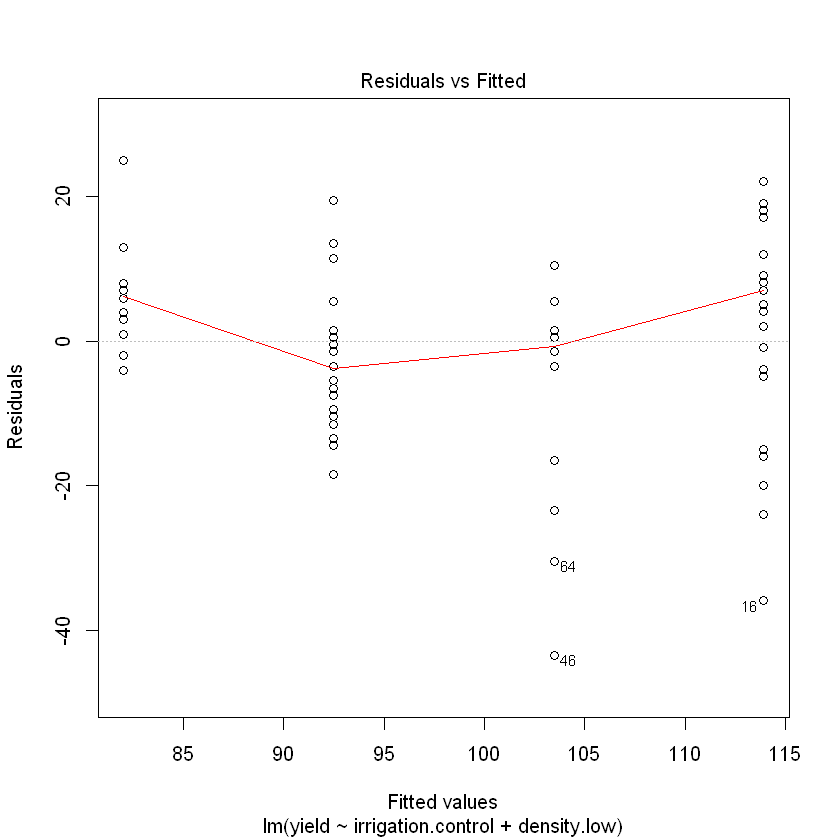

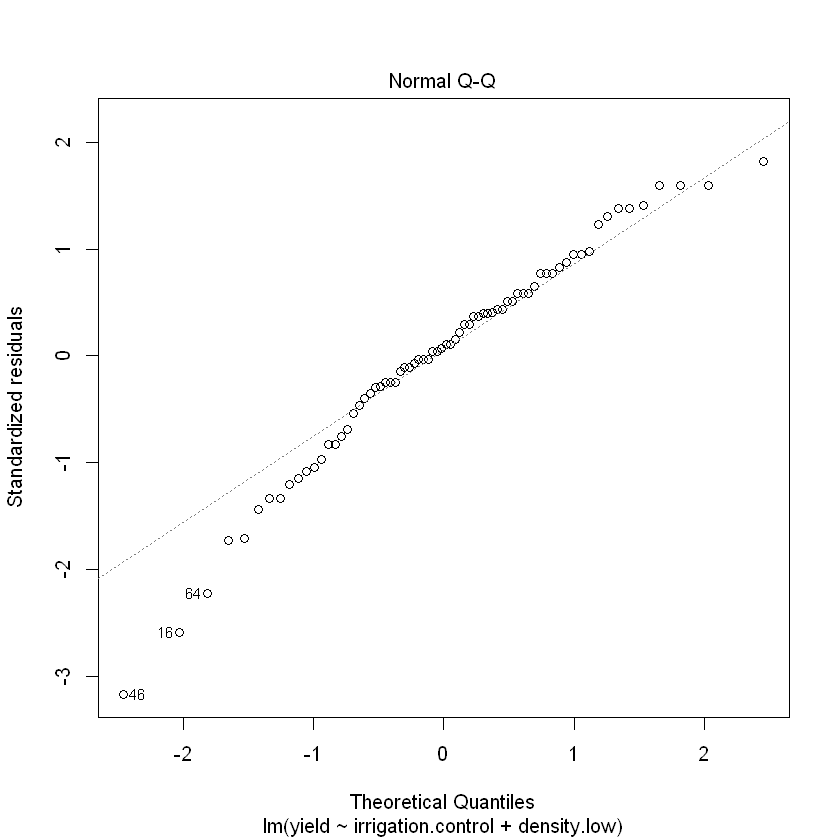

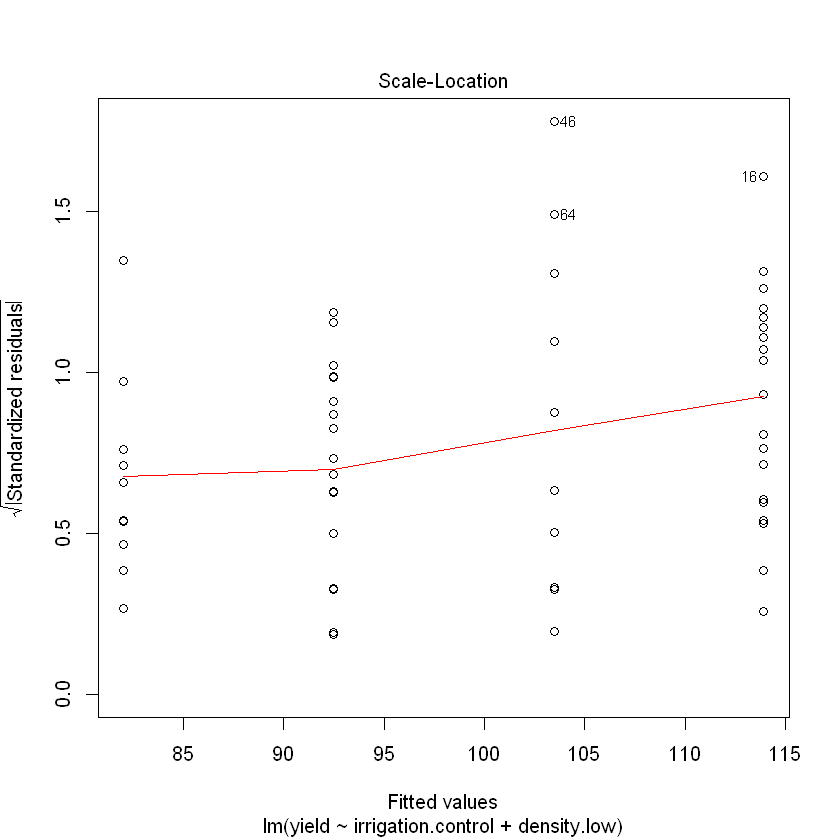

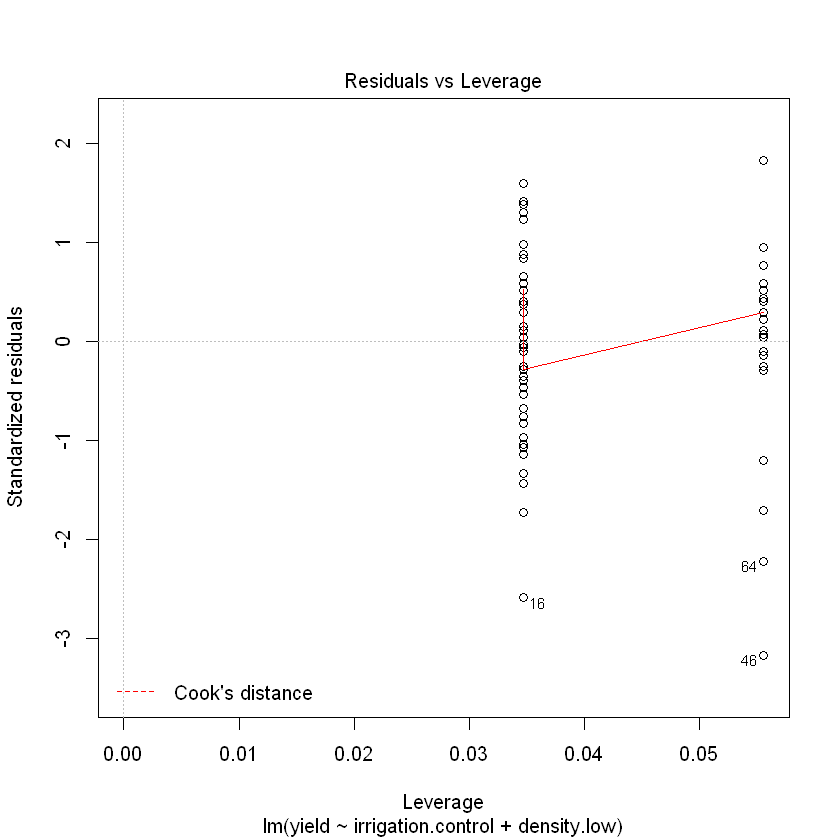

In [20]:
plot(dfnew_reg.fit)

In [34]:
dfnew_model.fit = lm(log(yield) ~.,data = dfnew.dummy)
summary(dfnew_model.fit)


Call:
lm(formula = log(yield) ~ ., data = dfnew.dummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45410 -0.07741  0.00902  0.09779  0.26121 

Coefficients: (4 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.750917   0.049163  96.637  < 2e-16 ***
block.A              -0.026669   0.046351  -0.575  0.56709    
block.B               0.007532   0.046351   0.163  0.87143    
block.C              -0.006411   0.046351  -0.138  0.89044    
block.D                     NA         NA      NA       NA    
irrigation.control   -0.204339   0.032775  -6.235 4.22e-08 ***
irrigation.irrigated        NA         NA      NA       NA    
density.high         -0.023482   0.040141  -0.585  0.56064    
density.low          -0.113179   0.040141  -2.820  0.00642 ** 
density.medium              NA         NA      NA       NA    
fertilizer.N         -0.082883   0.040141  -2.065  0.04307 *  
fertilizer.NP         0.0502

In [22]:
#model 2:yield = 4.75 - 0.204339*irrigation.control - 0.113179*density.low - 0.082883*fertilizer.N

In [35]:
dfnew_reg.fit = lm(log(yield) ~irrigation.control+density.low+fertilizer.N,data = dfnew.dummy)
summary(dfnew_reg.fit)


Call:
lm(formula = log(yield) ~ irrigation.control + density.low + 
    fertilizer.N, data = dfnew.dummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45412 -0.06624  0.02320  0.09932  0.27293 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.75792    0.02786 170.780  < 2e-16 ***
irrigation.control -0.20434    0.03217  -6.352 2.04e-08 ***
density.low        -0.10144    0.03412  -2.973  0.00408 ** 
fertilizer.N       -0.10802    0.03412  -3.166  0.00232 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1365 on 68 degrees of freedom
Multiple R-squared:  0.4654,	Adjusted R-squared:  0.4418 
F-statistic: 19.74 on 3 and 68 DF,  p-value: 2.606e-09


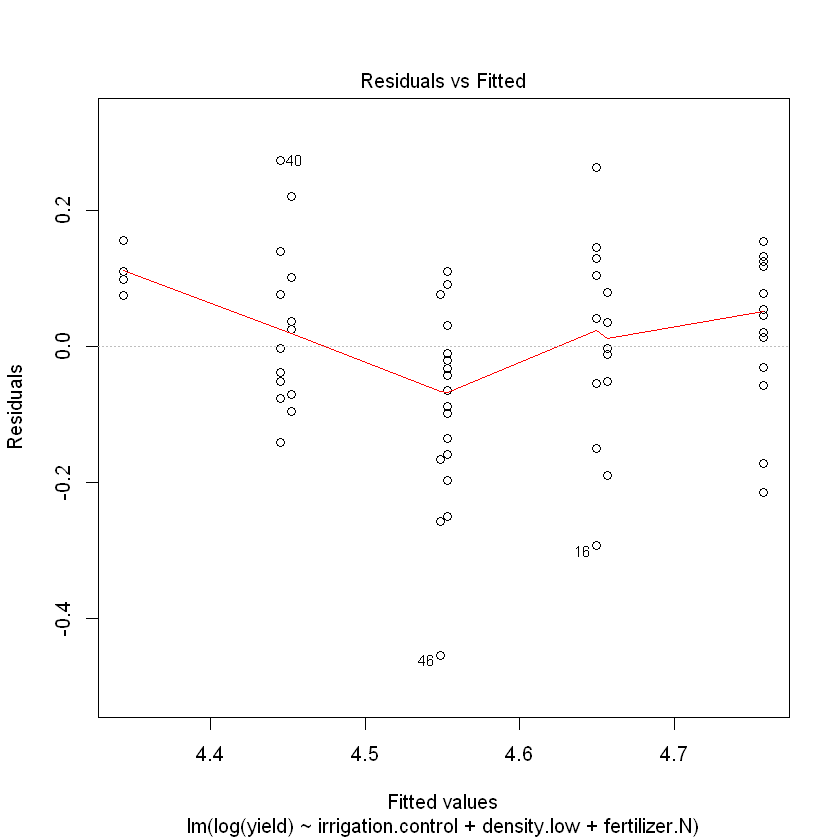

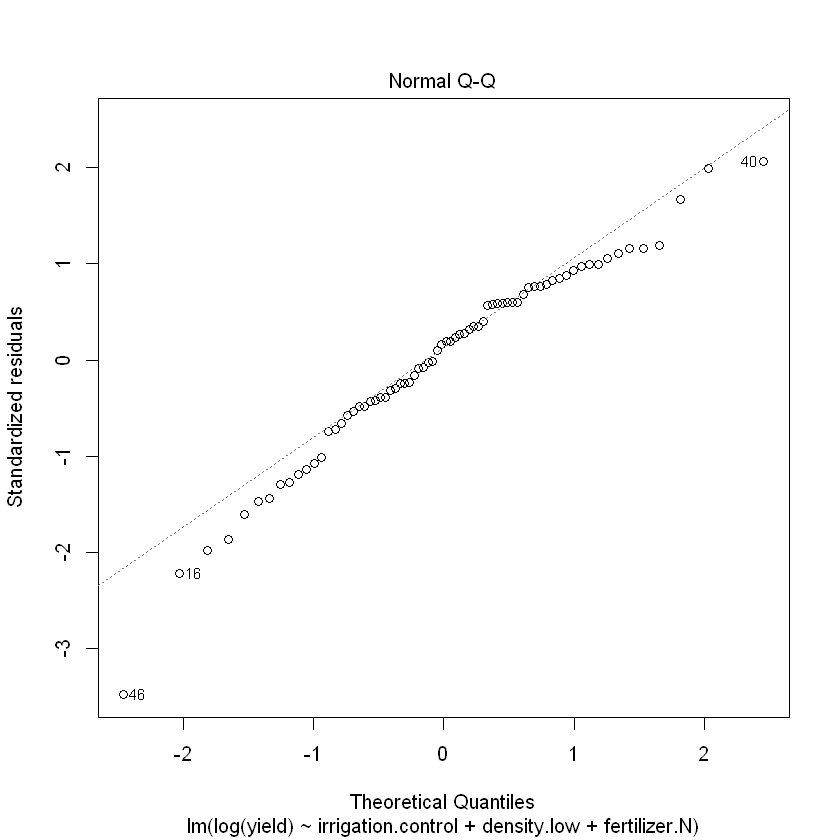

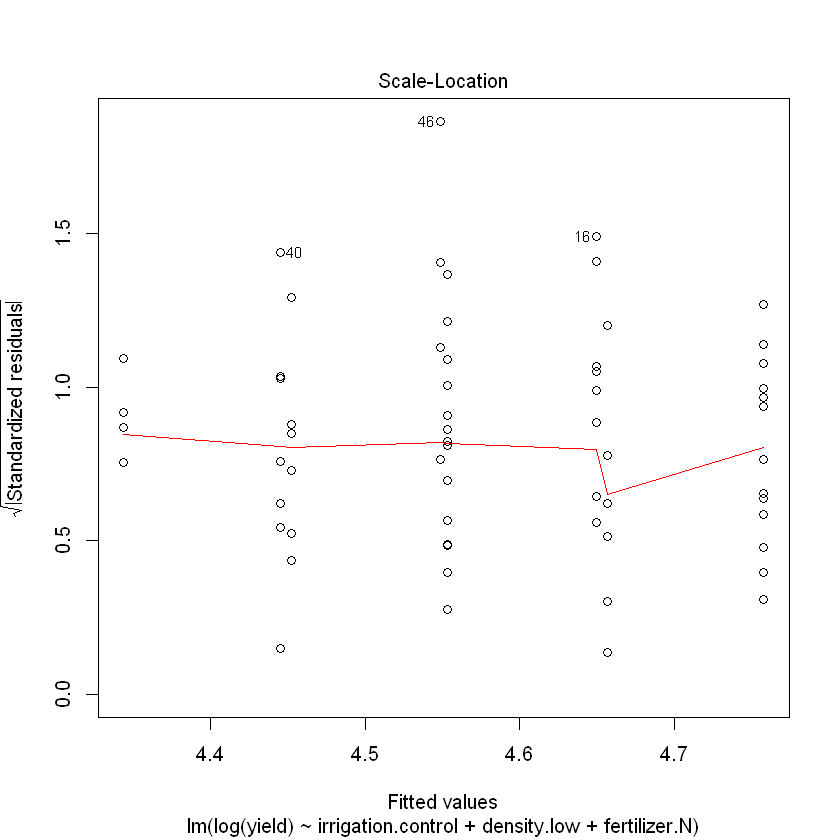

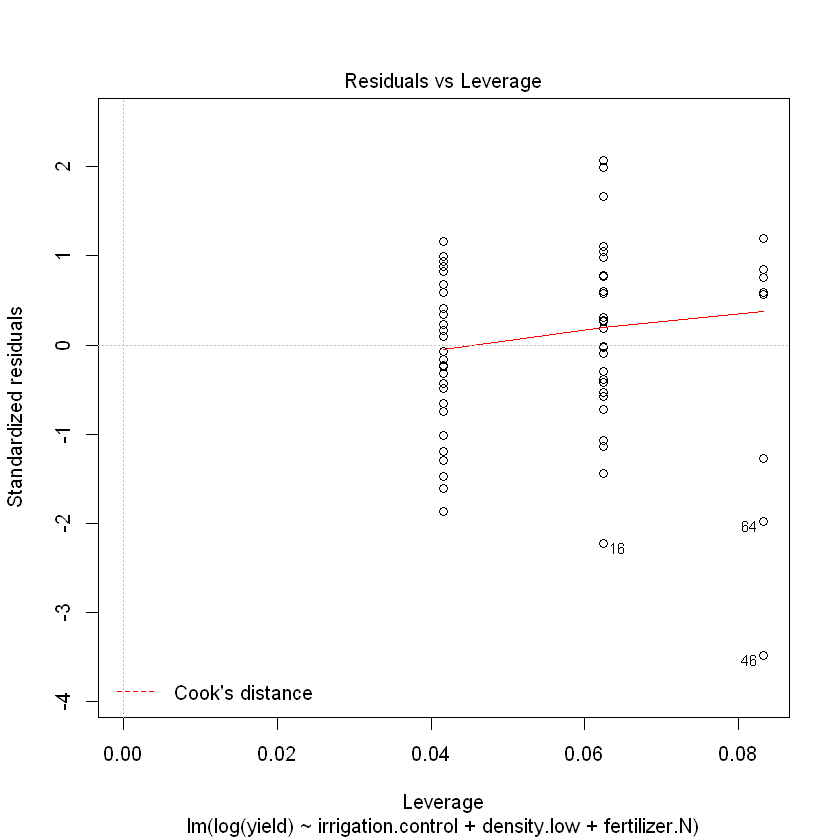

In [24]:
plot(dfnew_reg.fit)